In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Computer\ Vision/BTL/

/content/drive/MyDrive/Computer Vision/BTL


In [ ]:
!pip install tensorflow

In [ ]:
import os
import zipfile

In [ ]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:57<00:00, 44.9MB/s]
100% 2.29G/2.29G [00:57<00:00, 42.9MB/s]


In [ ]:
with zipfile.ZipFile("chest-xray-pneumonia.zip", 'r') as zip_ref:
    zip_ref.extractall("data")  # Giải nén vào thư mục 'data'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("TensorFlow version:", tf.__version__)

# Kiểm tra danh sách thiết bị GPU
gpus = tf.config.list_physical_devices('GPU')
print("GPU detected:", gpus)

In [ ]:
# Đường dẫn đến các thư mục
train_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train"
test_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test"
val_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val"

# Tạo dataset từ thư mục
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",  # Gắn nhãn binary: 0 (normal), 1 (pneumonia)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
)

In [ ]:
X_train = np.concatenate([x.numpy() for x, _ in train_ds], axis=0)
y_train = np.concatenate([y.numpy() for _, y in train_ds], axis=0)

X_val = np.concatenate([x.numpy() for x, _ in val_ds], axis=0)
y_val = np.concatenate([y.numpy() for _, y in val_ds], axis=0)

X_test = np.concatenate([x.numpy() for x, _ in test_ds], axis=0)
y_test = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

In [ ]:
# np.save("X_train.npy", np.concatenate([x.numpy() for x, _ in train_ds], axis=0))
# np.save("y_train.npy", np.concatenate([y.numpy() for _, y in train_ds], axis=0))

# np.save("X_val.npy", np.concatenate([x.numpy() for x, _ in val_ds], axis=0))
# np.save("y_val.npy", np.concatenate([y.numpy() for _, y in val_ds], axis=0))

# np.save("X_test.npy", np.concatenate([x.numpy() for x, _ in test_ds], axis=0))
# np.save("y_test.npy", np.concatenate([y.numpy() for _, y in test_ds], axis=0))

In [ ]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train shape: {X_val.shape}")
print(f"y_train shape: {y_val.shape}")
print(f"X_train shape: {X_test.shape}")
print(f"y_train shape: {y_test.shape}")

X_train shape: (5216, 150, 150, 3)
y_train shape: (5216, 1)
X_train shape: (16, 150, 150, 3)
y_train shape: (16, 1)
X_train shape: (624, 150, 150, 3)
y_train shape: (624, 1)


In [ ]:
def show_image_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(10):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].astype('uint8'))
        plt.title(int(label_batch[n]))
        plt.axis("off")

<ipython-input-29-2f98a1706404>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


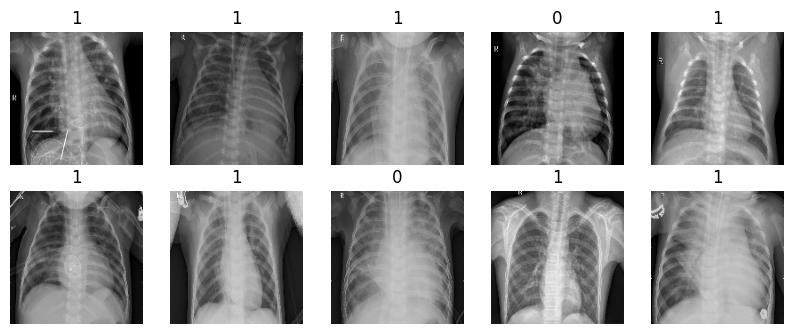

In [ ]:
show_image_batch(X_test[:20], y_test[:20])

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

##Thực hiện huấn luyện bằng mô hình tensorflow

### Huấn luyện theo mô hình AlexNet

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 35, 35, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 35, 35, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 17, 17, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             5

 Total params: 2,139,841 (8.16 MB)

 Trainable params: 2,138,881 (8.16 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
count_pneumonia = y_train.sum()
count_normal = len(y_train) - count_pneumonia
total = len(y_train)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

####Thử với class_weight nhưng bị Underfiting

In [ ]:
class_weights = {
    0: count_pneumonia / count_normal,
    1: 1.0
}

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),class_weight=class_weights)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4954 - loss: 1.9719 - val_accuracy: 0.4375 - val_loss: 0.6961
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5218 - loss: 1.0775 - val_accuracy: 0.6250 - val_loss: 0.6853
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5321 - loss: 1.0340 - val_accuracy: 0.5000 - val_loss: 0.7136
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4612 - loss: 1.0480 - val_accuracy: 0.5000 - val_loss: 0.7151
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4859 - loss: 1.0528 - val_accuracy: 0.5000 - val_loss: 0.7140
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5036 - loss: 1.0538 - val_accuracy: 0.5625 - val_loss: 0.6954
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5088 - loss: 1.0376 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5067 - loss: 1.0364 - val_acc

####Thử với SMOTE dữ liệu bị Underfitting

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Reshape X_train to 2D before applying SMOTE
X_train_2d = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE to the reshaped data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_2d, y_train)

# Reshape the resampled data back to the original 4D shape
X_resampled = X_resampled.reshape(X_resampled.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Now you can use X_resampled and y_resampled for training your model

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(X_resampled, y_resampled, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.5294 - loss: 1.1055 - val_accuracy: 0.5000 - val_loss: 0.7836
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5900 - loss: 0.6857 - val_accuracy: 0.5000 - val_loss: 2.6931
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5804 - loss: 0.6869 - val_accuracy: 0.5000 - val_loss: 2.8180
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6697 - loss: 0.6115 - val_accuracy: 0.5000 - val_loss: 1.6861
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6592 - loss: 0.6104 - val_accuracy: 0.5000 - val_loss: 4.1377
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6571 - loss: 0.6111 - val_accuracy: 0.5000 - val_loss: 3.0540
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6756 - loss: 0.5870 - val_accuracy: 0.5000 - val_loss: 0.8525
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7125 - loss: 0.5691 - val_acc

####Dùng mạng thích chập ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Kích thước đầu vào của hình ảnh
input_shape = (224, 224, 3)

# 1. ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze các layer của ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Tạo mô hình ResNet50
resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])




In [ ]:
resnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,278,337 (187.98 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Giả sử bạn có sẵn các thư mục train và validation
train_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train'
val_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val'


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
with tf.device('/device:GPU:0'):
    history_resnet = resnet_model.fit(
      train_generator,
      validation_data=val_generator,
      epochs=10,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_steps=val_generator.samples // val_generator.batch_size
  )

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6851 - loss: 2.3798

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1507s 9s/step - accuracy: 0.6853 - loss: 2.3714 - val_accuracy: 0.5000 - val_loss: 0.7507
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 754ms/step - accuracy: 0.7427 - loss: 0.5119 - val_accuracy: 0.5000 - val_loss: 0.7245
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 735ms/step - accuracy: 0.7379 - loss: 0.5135 - val_accuracy: 0.5000 - val_loss: 0.6152
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 733ms/step - accuracy: 0.7410 - loss: 0.4766 - val_accuracy: 0.5000 - val_loss: 0.6756
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 738ms/step - accuracy: 0.7463 - loss: 0.4683 - val_accuracy: 0.5000 - val_loss: 0.7866
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 743ms/step - accuracy: 0.7427 - loss: 0.4679 - val_accuracy: 0.5000 - val_loss: 1.0379
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 734ms/step - accuracy: 0.7392 - loss: 0.5092 - val_accuracy: 0.5000 - val_loss: 0.7887
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 733ms/step - accuracy: 0.7418 - loss: 0.5060

In [ ]:
test_dir = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test'

In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [ ]:
y_red = resnet_model.predict(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 152s 8s/step


In [ ]:
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_generator)
print(f"ResNet50 Test Loss: {test_loss_resnet}, Test Accuracy: {test_accuracy_resnet}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.2984 - loss: 0.8297
ResNet50 Test Loss: 0.5202682614326477, Test Accuracy: 0.625


In [ ]:
predictions_resnet = [1 if p > 0.5 else 0 for p in y_pred]
print("Predictions ResNet50:", predictions_resnet)

Predictions ResNet50: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


####Lưu và xem set mô hình

In [ ]:
model.save("Pneumonia_best.h5")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3696 - loss: 4.4655
Test loss: 4.5019
Test accuracy: 0.3750


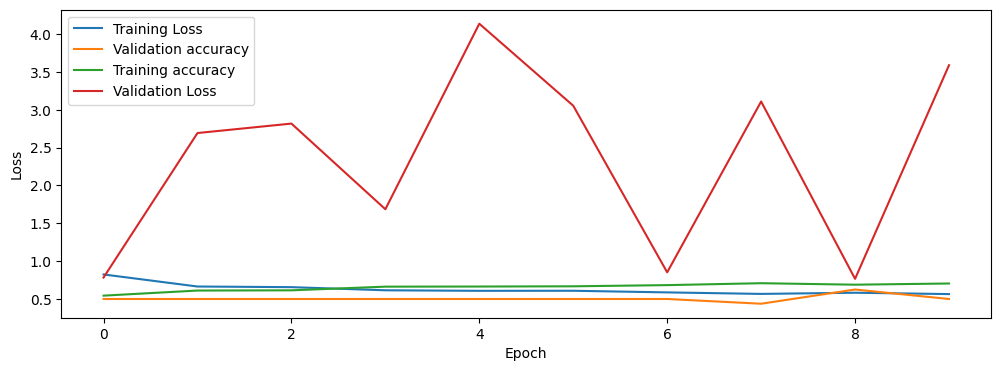

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test[0:20])
y_pred = (y_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


<ipython-input-29-2f98a1706404>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


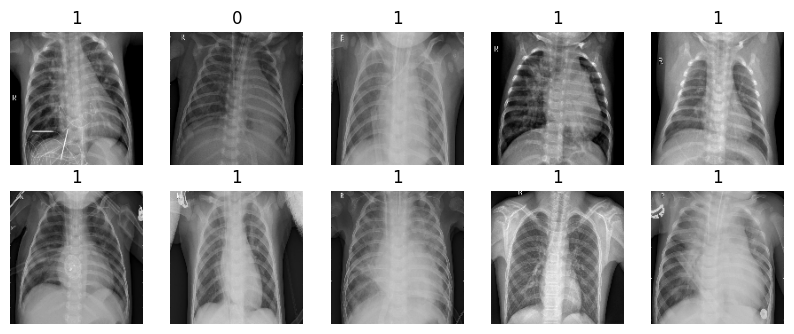

In [ ]:
show_image_batch(X_test[:20], y_pred)

<ipython-input-29-2f98a1706404>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(label_batch[n]))


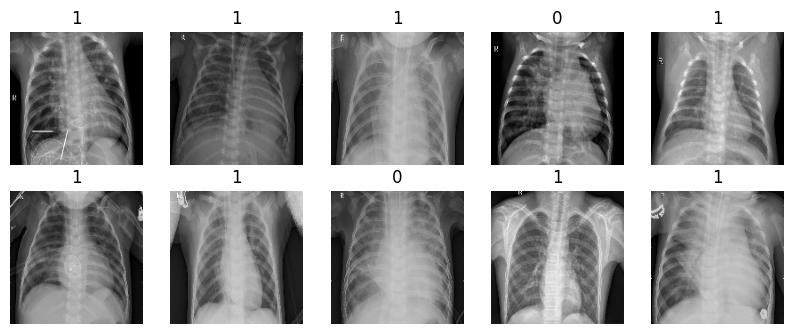

In [ ]:
show_image_batch(X_test[0:20], y_test[0:20])

#Huấn luyện mô hình
accuracy training là > 0.9 và accuracy val là 0.8

Sử dụng ImageDataGenerator để mở rộng dữ liệu,
kernel_regularizer để chuẩn hóa các trọng số giảm overfiting


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Đường dẫn đến tập dữ liệu
train_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train"
test_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test"
val_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val"

# Kích thước ảnh và batch size
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation và tiền xử lý dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3),kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.6),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
with tf.device('/device:GPU:0'):
    history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      validation_data=val_generator,
      validation_steps=val_generator.samples // batch_size,
      epochs=30,
      callbacks=[checkpoint, early_stopping]
  )

# Đánh giá mô hình trên tập test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

# Lưu mô hình
model.save('savemodels/pneumonia_detection_model.h5')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.6510 - loss: 12.3849

163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 537ms/step - accuracy: 0.6514 - loss: 12.3841 - val_accuracy: 0.5000 - val_loss: 12.8164
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 517ms/step - accuracy: 0.7849 - loss: 12.0062 - val_accuracy: 0.5000 - val_loss: 14.6967
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 521ms/step - accuracy: 0.8048 - loss: 11.8362 - val_accuracy: 0.5000 - val_loss: 14.6336
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.8355 - loss: 11.6780

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 531ms/step - accuracy: 0.8355 - loss: 11.6779 - val_accuracy: 0.5625 - val_loss: 12.6743
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.8468 - loss: 11.5430

163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 519ms/step - accuracy: 0.8468 - loss: 11.5428 - val_accuracy: 0.6875 - val_loss: 12.0538
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 524ms/step - accuracy: 0.8455 - loss: 11.4403 - val_accuracy: 0.6875 - val_loss: 11.7473
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8574 - loss: 11.3234

163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 518ms/step - accuracy: 0.8574 - loss: 11.3231 - val_accuracy: 0.7500 - val_loss: 11.4870
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 514ms/step - accuracy: 0.8565 - loss: 11.1969 - val_accuracy: 0.6875 - val_loss: 11.4628
Epoch 9/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 515ms/step - accuracy: 0.8602 - loss: 11.0656 - val_accuracy: 0.6875 - val_loss: 11.3785
Epoch 10/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 521ms/step - accuracy: 0.8741 - loss: 10.9267 - val_accuracy: 0.7500 - val_loss: 11.1035
Epoch 11/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.8759 - loss: 10.8268

163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 521ms/step - accuracy: 0.8759 - loss: 10.8265 - val_accuracy: 0.8125 - val_loss: 11.0643
Epoch 12/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 673ms/step - accuracy: 0.8780 - loss: 10.6872 - val_accuracy: 0.7500 - val_loss: 10.9862
Epoch 13/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 514ms/step - accuracy: 0.8713 - loss: 10.5622 - val_accuracy: 0.7500 - val_loss: 10.9103
Epoch 14/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 516ms/step - accuracy: 0.8797 - loss: 10.4273 - val_accuracy: 0.7500 - val_loss: 10.7563
Epoch 15/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 517ms/step - accuracy: 0.8881 - loss: 10.2884 - val_accuracy: 0.7500 - val_loss: 10.7787
Epoch 16/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 520ms/step - accuracy: 0.8870 - loss: 10.1501 - val_accuracy: 0.7500 - val_loss: 10.4801
Epoch 17/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 513ms/step - accuracy: 0.8830 - loss: 10.0403 - val_accuracy: 0.7500 - val_loss: 10.2449
Epoch 18/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 514ms/step - accuracy: 

163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 527ms/step - accuracy: 0.9135 - loss: 8.7869 - val_accuracy: 0.8750 - val_loss: 9.0268
Epoch 27/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 522ms/step - accuracy: 0.9073 - loss: 8.6780 - val_accuracy: 0.6875 - val_loss: 9.0017
Epoch 28/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 517ms/step - accuracy: 0.9052 - loss: 8.5402 - val_accuracy: 0.6875 - val_loss: 9.2557
Epoch 29/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 522ms/step - accuracy: 0.9175 - loss: 8.4010 - val_accuracy: 0.6875 - val_loss: 8.8822
Epoch 30/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 524ms/step - accuracy: 0.9131 - loss: 8.2785 - val_accuracy: 0.7500 - val_loss: 8.5960
Found 624 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.8196 - loss: 8.3911


Test accuracy: 0.8059


In [ ]:
import matplotlib.pyplot as plt

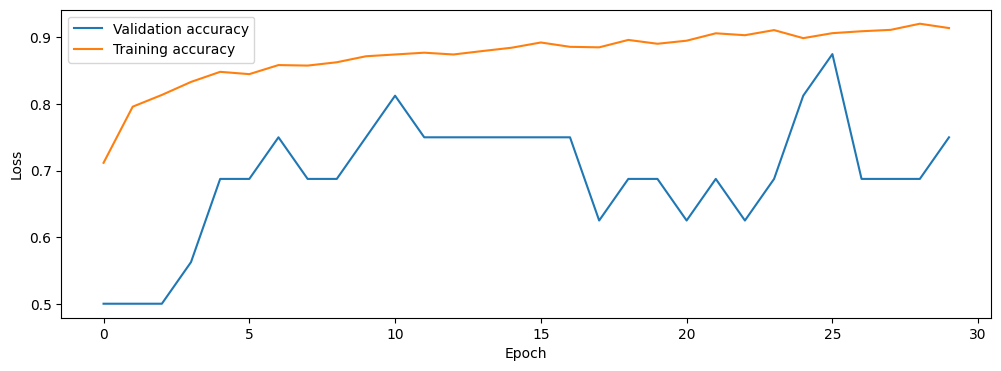

In [ ]:
plt.figure(figsize=(12, 4))
# plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = load_model('savemodels/pneumonia_detection_model.h5')

In [ ]:
def show_image_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(len(image_batch)):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].astype('uint8'))
        plt.title(int(label_batch[n]))
        plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


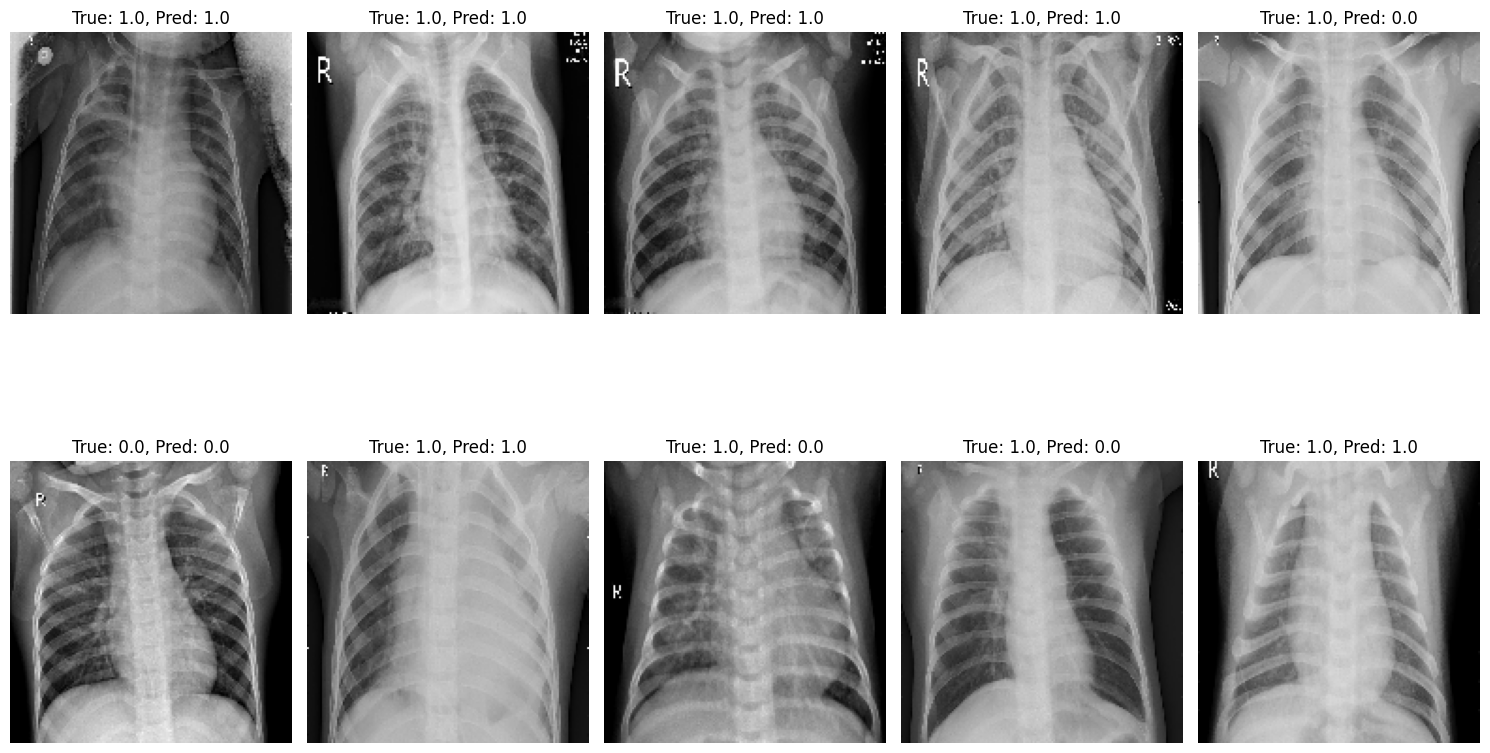

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_images, test_labels = next(test_generator)
test_images = test_images[:10]
test_labels = test_labels[:10]

predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()


plt.figure(figsize=(15, 10))
for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {test_labels[i]}, Pred: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_images, test_labels = [], []
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    test_images.extend(images)
    test_labels.extend(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()

cm = confusion_matrix(test_labels, predictions)

TN, FP, FN, TP = cm.ravel()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
print(f"True Positive (TP): {TP}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")

True Positive (TP): 271
False Negative (FN): 124
False Positive (FP): 9
True Negative (TN): 220


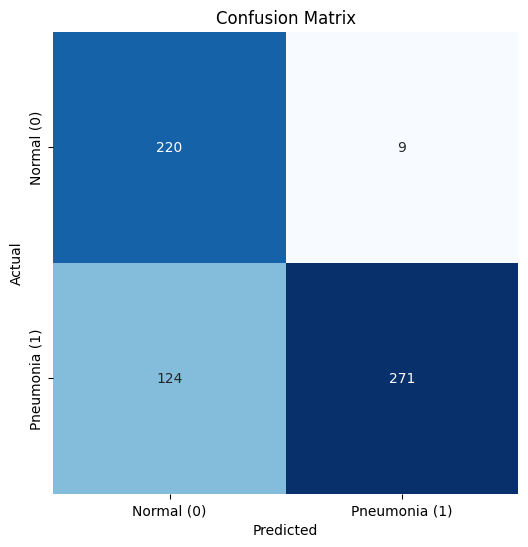

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Pneumonia (1)'],
            yticklabels=['Normal (0)', 'Pneumonia (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Update mô hình (final)

Dữ liệu train bị chênh lệnh nhiều, pneumonia chiếm phần lớn hơn normal, vì thế sử dụng class_weaght để cân bằng lại dữ liệu

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Đường dẫn đến tập dữ liệu
train_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/train"
test_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test"
val_dir = "/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/val"

# Kích thước ảnh và batch size
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation và tiền xử lý dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3),kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.6),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


class_weights = {
    0: 2.5,
    1: 1.0
}

# Huấn luyện mô hình
with tf.device('/device:GPU:0'):
    history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      validation_data=val_generator,
      validation_steps=val_generator.samples // batch_size,
      epochs=30,
      class_weight=class_weights,
      callbacks=[checkpoint, early_stopping]
  )

# Đánh giá mô hình trên tập test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

# Lưu mô hình
model.save('savemodels/pneumonia_detection_model_v2.h5')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7309 - loss: 2.0083

163/163 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 0.7312 - loss: 2.0074 - val_accuracy: 0.5000 - val_loss: 4.7408
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 589ms/step - accuracy: 0.8458 - loss: 1.6565 - val_accuracy: 0.5000 - val_loss: 8.3625
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 529ms/step - accuracy: 0.8495 - loss: 1.6023 - val_accuracy: 0.5000 - val_loss: 8.3954
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 521ms/step - accuracy: 0.8585 - loss: 1.5714 - val_accuracy: 0.5000 - val_loss: 6.5680
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8737 - loss: 1.5412

163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 514ms/step - accuracy: 0.8737 - loss: 1.5410 - val_accuracy: 0.6250 - val_loss: 3.1535
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.8929 - loss: 1.4763 - val_accuracy: 0.6250 - val_loss: 3.7634
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 517ms/step - accuracy: 0.9048 - loss: 1.4290 - val_accuracy: 0.5625 - val_loss: 4.0141
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 514ms/step - accuracy: 0.9067 - loss: 1.4149 - val_accuracy: 0.5625 - val_loss: 3.1230
Epoch 9/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9100 - loss: 1.3543

163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.9100 - loss: 1.3544 - val_accuracy: 0.6875 - val_loss: 1.5352
Epoch 10/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 521ms/step - accuracy: 0.9072 - loss: 1.3603 - val_accuracy: 0.5000 - val_loss: 1.8985
Epoch 11/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.9135 - loss: 1.3306

163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 518ms/step - accuracy: 0.9135 - loss: 1.3305 - val_accuracy: 0.8125 - val_loss: 1.3695
Epoch 12/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 530ms/step - accuracy: 0.9127 - loss: 1.3112 - val_accuracy: 0.6875 - val_loss: 1.8324
Epoch 13/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 538ms/step - accuracy: 0.9317 - loss: 1.2617 - val_accuracy: 0.6250 - val_loss: 1.8210
Epoch 14/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 536ms/step - accuracy: 0.9199 - loss: 1.2847 - val_accuracy: 0.6875 - val_loss: 2.2871
Epoch 15/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 538ms/step - accuracy: 0.9340 - loss: 1.2276 - val_accuracy: 0.5625 - val_loss: 1.7203
Epoch 16/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.9219 - loss: 1.2339

163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 535ms/step - accuracy: 0.9219 - loss: 1.2338 - val_accuracy: 0.8750 - val_loss: 1.4016
Found 624 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.8920 - loss: 1.2675


Test accuracy: 0.8964


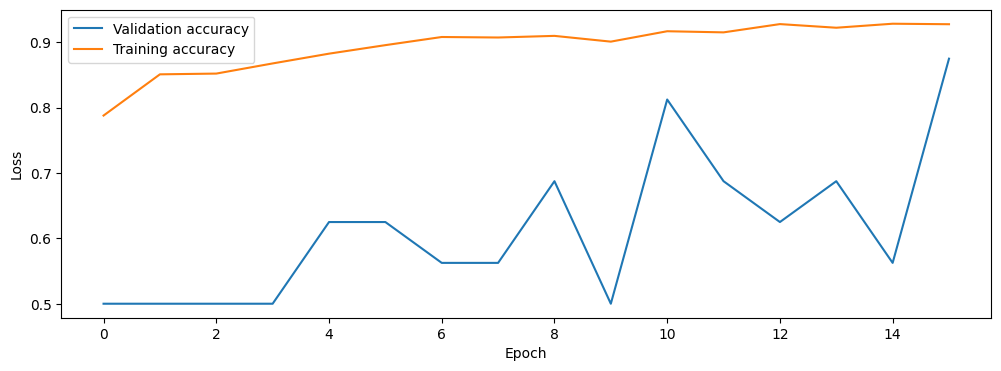

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
# plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['accuracy'], label='Training accuracy')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


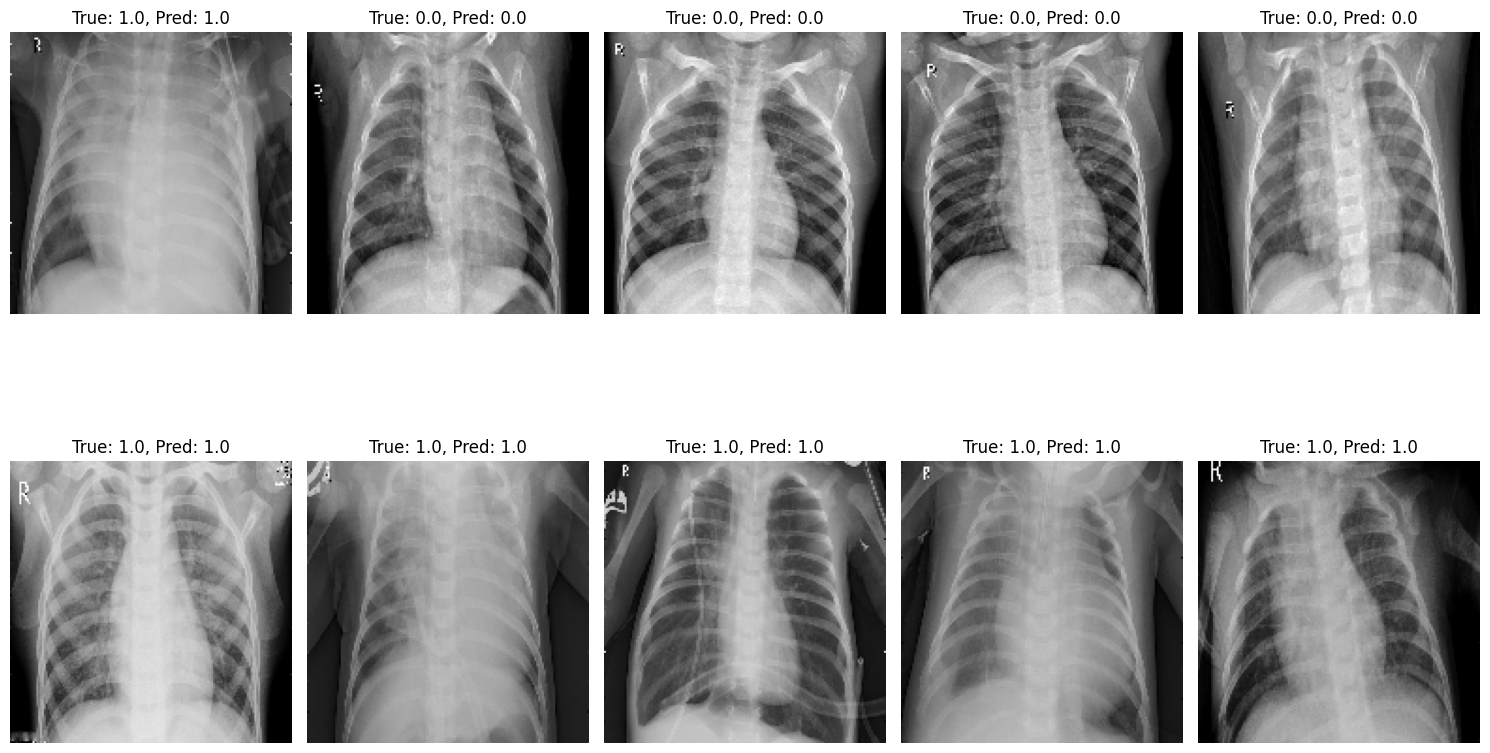

In [ ]:
import numpy as np

test_images, test_labels = next(test_generator)
test_images = test_images[:10]
test_labels = test_labels[:10]

predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()


plt.figure(figsize=(15, 10))
for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {test_labels[i]}, Pred: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_images, test_labels = [], []
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    test_images.extend(images)
    test_labels.extend(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
predictions = model.predict(test_images)
predictions = np.round(predictions).flatten()

cm = confusion_matrix(test_labels, predictions)

TN, FP, FN, TP = cm.ravel()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [ ]:
print(f"True Positive (TP): {TP}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")

True Positive (TP): 351
False Negative (FN): 41
False Positive (FP): 21
True Negative (TN): 211


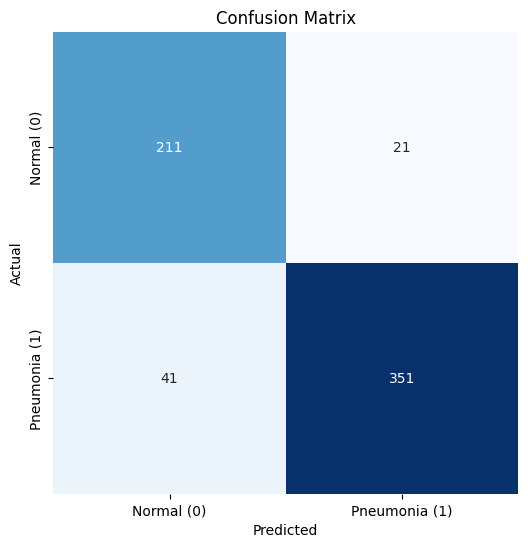

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Pneumonia (1)'],
            yticklabels=['Normal (0)', 'Pneumonia (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Computer Vision/BTL/savemodels/pneumonia_detection_model_v2.h5")

In [ ]:
img_path = '/content/drive/MyDrive/Computer Vision/BTL/normal.jpg'
img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0] < 0.5:
    print("Prediction: Normal (No Pneumonia)")
else:
    print("Prediction: Pneumonia")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Normal (No Pneumonia)


In [ ]:
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/PNEUMONIA/person125_bacteria_595.jpeg'
img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0] < 0.5:
    print("Prediction: Normal (No Pneumonia)")
else:
    print("Prediction: Pneumonia")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Pneumonia


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


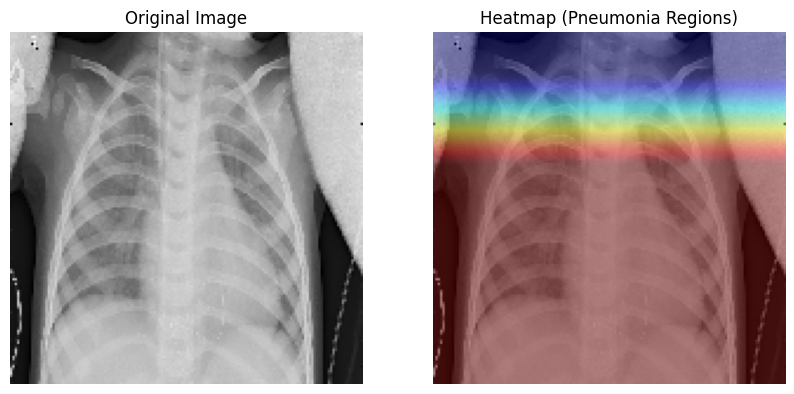

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# Load mô hình đã huấn luyện
model = tf.keras.models.load_model('savemodels/pneumonia_detection_model_v2.h5')

# Đường dẫn đến ảnh cần dự đoán
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/PNEUMONIA/person138_bacteria_659.jpeg'

# Load ảnh và tiền xử lý
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Lấy lớp Global Average Pooling và lớp Dense cuối cùng
gap_layer = model.get_layer('global_average_pooling2d_1')  # Thay bằng tên lớp GAP của bạn
dense_layer = model.get_layer('dense_3')  # Thay bằng tên lớp Dense cuối cùng của bạn

# Tạo mô hình mới để lấy đầu ra của lớp GAP và lớp Dense
cam_model = tf.keras.models.Model(
    inputs=[model.inputs],
    outputs=[gap_layer.output, dense_layer.output]
)

# Lấy đầu ra của lớp GAP và lớp Dense
gap_output, predictions = cam_model(img_array)
class_weights = dense_layer.get_weights()[0]  # Trọng số của lớp Dense

# Tính heatmap
heatmap = np.dot(gap_output[0], class_weights[:, 0])  # Nhân trọng số với đầu ra GAP
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Resize heatmap về kích thước ảnh gốc
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))

# Hiển thị heatmap lên ảnh gốc
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)

# Hiển thị ảnh gốc và heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Heatmap (Pneumonia Regions)')
plt.imshow(superimposed_img)
plt.axis('off')

plt.show()

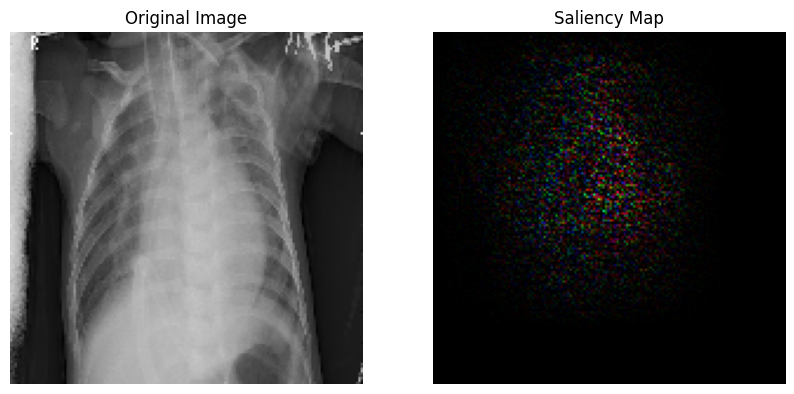

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load mô hình đã huấn luyện
model = tf.keras.models.load_model('savemodels/pneumonia_detection_model_v2.h5')

# Đường dẫn đến ảnh cần dự đoán
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/PNEUMONIA/person128_bacteria_607.jpeg'

# Load ảnh và tiền xử lý
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Tính gradient của đầu ra dự đoán so với đầu vào
with tf.GradientTape() as tape:
    tape.watch(img_array)
    predictions = model(img_array)
    loss = predictions[:, 0]  # Lấy giá trị dự đoán (binary classification)

grads = tape.gradient(loss, img_array)[0]

# Chuẩn hóa gradient
grads = np.maximum(grads, 0)
grads /= np.max(grads)

# Hiển thị Saliency Map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Saliency Map')
plt.imshow(grads, cmap='hot')
plt.axis('off')

plt.show()

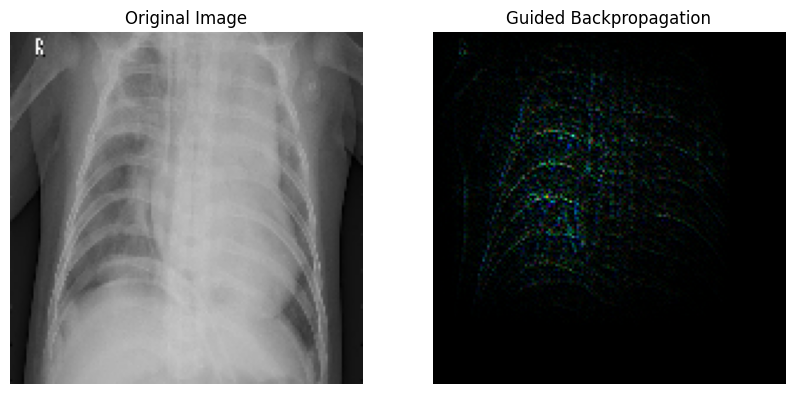

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('savemodels/pneumonia_detection_model_v2.h5')

# Đường dẫn đến ảnh cần dự đoán
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg'

# Load ảnh và tiền xử lý
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Hàm Guided ReLU
@tf.custom_gradient
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy > 0, tf.float32) * tf.cast(x > 0, tf.float32) * dy
    return tf.nn.relu(x), grad

# Thay thế ReLU bằng Guided ReLU trong mô hình
for layer in model.layers:
    if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
        layer.activation = guided_relu

# Tính gradient của đầu ra dự đoán so với đầu vào
with tf.GradientTape() as tape:
    tape.watch(img_array)
    predictions = model(img_array)
    loss = predictions[:, 0]  # Lấy giá trị dự đoán (binary classification)

grads = tape.gradient(loss, img_array)[0]

# Chuẩn hóa gradient
grads = np.maximum(grads, 0)
grads /= np.max(grads)

# Hiển thị Guided Backpropagation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Guided Backpropagation')
plt.imshow(grads, cmap='hot')
plt.axis('off')

plt.show()

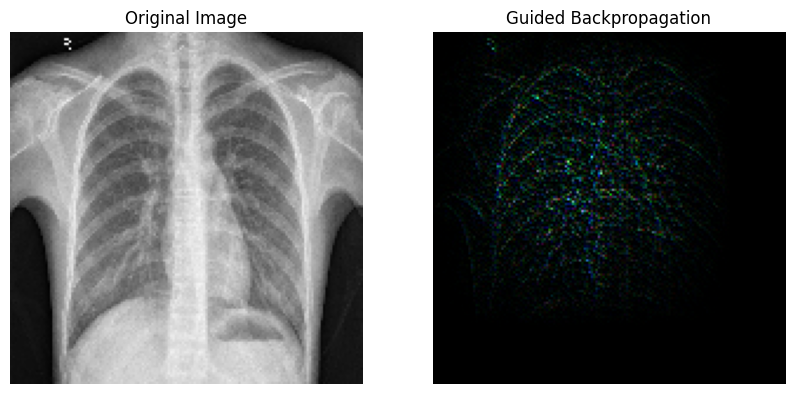

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('savemodels/pneumonia_detection_model_v2.h5')

# Đường dẫn đến ảnh cần dự đoán
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/NORMAL/IM-0016-0001.jpeg'

# Load ảnh và tiền xử lý
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Hàm Guided ReLU
@tf.custom_gradient
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy > 0, tf.float32) * tf.cast(x > 0, tf.float32) * dy
    return tf.nn.relu(x), grad

# Thay thế ReLU bằng Guided ReLU trong mô hình
for layer in model.layers:
    if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
        layer.activation = guided_relu

# Tính gradient của đầu ra dự đoán so với đầu vào
with tf.GradientTape() as tape:
    tape.watch(img_array)
    predictions = model(img_array)
    loss = predictions[:, 0]  # Lấy giá trị dự đoán (binary classification)

grads = tape.gradient(loss, img_array)[0]

# Chuẩn hóa gradient
grads = np.maximum(grads, 0)
grads /= np.max(grads)

# Hiển thị Guided Backpropagation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Guided Backpropagation')
plt.imshow(grads, cmap='hot')
plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


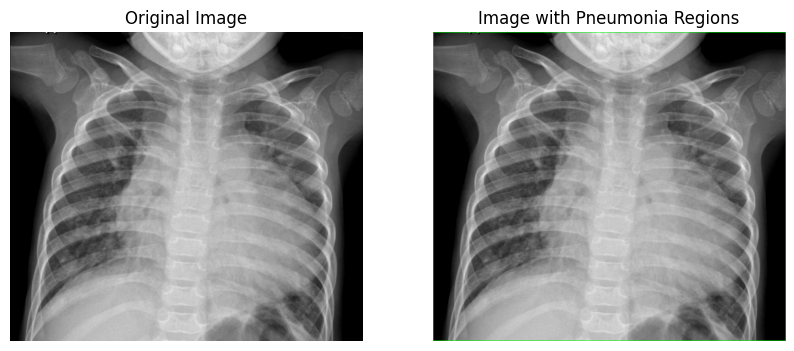

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load mô hình U-Net đã huấn luyện
model = load_model('savemodels/pneumonia_detection_model_v2.h5')

# Load ảnh gốc
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/PNEUMONIA/person108_bacteria_511.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang RGB
img_resized = cv2.resize(img, (256, 256))  # Resize về kích thước đầu vào của U-Net
img_normalized = img_resized / 255.0  # Chuẩn hóa về khoảng [0, 1]

# Dự đoán mask
mask = model.predict(np.expand_dims(img_normalized, axis=0))[0]

# Resize mask về kích thước ảnh gốc
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

# Áp dụng ngưỡng để xác định các vùng viêm phổi
_, thresholded_mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)

# Tìm contours từ mask
contours, _ = cv2.findContours(thresholded_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ contours lên ảnh gốc
output_img = img.copy()
cv2.drawContours(output_img, contours, -1, (0, 255, 0), 2)  # Vẽ contours màu xanh lá cây

# Hiển thị ảnh gốc và ảnh đã khoanh vùng
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image with Pneumonia Regions')
plt.imshow(output_img)
plt.axis('off')

plt.show()

In [ ]:
for layer in model.layers:
    print(layer.name)

conv2d_5
batch_normalization_5
max_pooling2d_5
conv2d_6
batch_normalization_6
max_pooling2d_6
conv2d_7
batch_normalization_7
max_pooling2d_7
conv2d_8
batch_normalization_8
max_pooling2d_8
conv2d_9
batch_normalization_9
max_pooling2d_9
global_average_pooling2d_1
dense_3
dropout_2
dense_4
dropout_3
dense_5


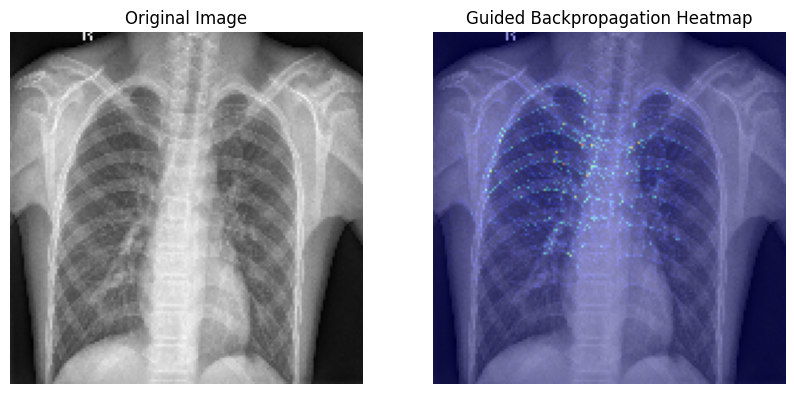

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# Hàm Guided ReLU
@tf.custom_gradient
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy > 0, tf.float32) * tf.cast(x > 0, tf.float32) * dy
    return tf.nn.relu(x), grad

# Thay thế ReLU bằng Guided ReLU trong mô hình
def replace_relu_with_guided_relu(model):
    for layer in model.layers:
        if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
            layer.activation = guided_relu

# Load mô hình đã huấn luyện
model = tf.keras.models.load_model('savemodels/pneumonia_detection_model_v2.h5')

# Thay thế ReLU bằng Guided ReLU
replace_relu_with_guided_relu(model)

# Đường dẫn đến ảnh cần dự đoán
img_path = '/content/drive/MyDrive/Computer Vision/BTL/data/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg'

# Load ảnh và tiền xử lý
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch

img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

# Tính gradient của đầu ra dự đoán so với đầu vào
with tf.GradientTape() as tape:
    tape.watch(img_array)
    predictions = model(img_array)
    loss = predictions[:, 0]  # Lấy giá trị dự đoán (binary classification)

# Lấy gradient của đầu ra so với đầu vào
grads = tape.gradient(loss, img_array)[0]

# Chuẩn hóa gradient
grads = np.maximum(grads, 0)
grads /= np.max(grads)

# Resize gradient về kích thước ảnh gốc
grads = cv2.resize(grads, (img.size[1], img.size[0]))

# Hiển thị heatmap lên ảnh gốc
heatmap = np.uint8(255 * grads)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(cv2.cvtColor(np.uint8(img), cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)

# Hiển thị ảnh gốc và heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Guided Backpropagation Heatmap')
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()